# Workshop Blog: 如何开发使用微信聊天机器人教程
## Part 1: 问答机制示范(自动接收、回复消息。支持私信，群组，公众号等)
* 文字的接收和发送回复
* 图片的接收和发送回复
* 语音的接收和发送回复


## Part 2: 图像识别
* 识别图片消息中的物体名字
* 识别人脸

## Part 3: 自然语言处理
* 语音消息的识别，转换成文字
* 消息文字转成语音
* 消息的多语言互译


## www.KudosData.com
### By: Sam GU Zhan
### April, 2017

## Imports 导入一些库

In [1]:
#!/usr/bin/env python
# coding: utf-8
import time
from kudos_data_wxbot import *

class MyWXBot(WXBot):
    def handle_msg_all(self, msg):
        if msg['msg_type_id'] == 4 and msg['content']['type'] == 0:
            self.send_msg_by_uid(u'Hi there! I am Kudos Data Intelligent Agent', msg['user']['id'])
            self.send_img_msg_by_uid("./pic.jpg", msg['user']['id'])
            self.send_file_msg_by_uid("./logo.pdf", msg['user']['id'])

    def schedule(self):
        self.send_msg(u'tb', u'schedule')
        time.sleep(1)


## Login by scan QR code from WeChat APP in mobile phone

In [2]:
bot = MyWXBot()
# bot = WXBot()
bot.DEBUG = True

QR image file_path is: /home/user/notebooks/workshop_blog/wechat_tool/temp/wxqr.png
[INFO] Please use WeChat to scan the QR code .


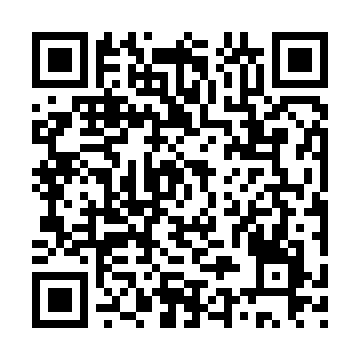

In [3]:
bot.qr_auth()
Image('./temp/wxqr.png')

In [16]:
bot.run_adhoc()

HTTPSConnectionPool(host='login.weixin.qq.com', port=443): Max retries exceeded with url: /cgi-bin/mmwebwx-bin/login?tip=1&uuid=oaf3Reahng==&_=1492084681 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x7f66d5e6c310>: Failed to establish a new connection: [Errno -2] Name or service not known',)) Traceback (most recent call last):
  File "kudos_data_wxbot.py", line 58, in request
    allow_redirects, proxies, hooks, stream, verify, cert, json)
  File "/home/user/env/lib/python2.7/site-packages/requests/sessions.py", line 488, in request
    resp = self.send(prep, **send_kwargs)
  File "/home/user/env/lib/python2.7/site-packages/requests/sessions.py", line 609, in send
    r = adapter.send(request, **kwargs)
  File "/home/user/env/lib/python2.7/site-packages/requests/adapters.py", line 487, in send
    raise ConnectionError(e, request=request)
ConnectionError: HTTPSConnectionPool(host='login.weixin.qq.com', port=443): Max retries ex

### Obtain entire friend list

In [17]:
len(bot.contact_list)

1

In [18]:
len(bot.group_list)

1

In [19]:
len(bot.public_list)

1

In [20]:
len(bot.special_list)

0

In [21]:
bot.group_list

[{u'Alias': u'',
  u'AppAccountFlag': 0,
  u'AttrStatus': 0,
  u'ChatRoomId': 0,
  u'City': u'',
  u'ContactFlag': 3,
  u'DisplayName': u'',
  u'EncryChatRoomId': u'',
  u'HeadImgUrl': u'/cgi-bin/mmwebwx-bin/webwxgetheadimg?seq=637730366&username=@@46ec9c2c0a08a9017f2a519c659dcd4f8390dbc8d7030f783068ded14ba3ae51&skey=@crypt_936d9d3e_1316e11cf5185d507fe76a0ce41516ce',
  u'HideInputBarFlag': 0,
  u'IsOwner': 0,
  u'KeyWord': u'',
  u'MemberCount': 0,
  u'MemberList': [],
  u'NickName': u'\u9177\u8c46\u6570\u636e\u79d1\u5b66\u5206\u4eab KudosData.com',
  u'OwnerUin': 0,
  u'PYInitial': u'KDSJKXFXKUDOSDATACOM',
  u'PYQuanPin': u'kudoushujukexuefenxiangKudosDatacom',
  u'Province': u'',
  u'RemarkName': u'',
  u'RemarkPYInitial': u'',
  u'RemarkPYQuanPin': u'',
  u'Sex': 0,
  u'Signature': u'',
  u'SnsFlag': 0,
  u'StarFriend': 0,
  u'Statues': 1,
  u'Uin': 0,
  u'UniFriend': 0,
  u'UserName': u'@@46ec9c2c0a08a9017f2a519c659dcd4f8390dbc8d7030f783068ded14ba3ae51',
  u'VerifyFlag': 0}]

In [ ]:
# Kudos Data Chat Bot MM
uid = "@68a7dc570fc7f43e9856e3be523a97e17be7c60ebb1741b29455ecdf7f6096e8"

In [ ]:
bot.is_contact(uid)

In [ ]:
bot.get_contact_name(uid)

In [22]:
# Kudos Data Group
uid = u'@@46ec9c2c0a08a9017f2a519c659dcd4f8390dbc8d7030f783068ded14ba3ae51'

In [23]:
bot.is_contact(uid)

False

In [24]:
bot.get_contact_name(uid)

{'nickname': u'\u9177\u8c46\u6570\u636e\u79d1\u5b66\u5206\u4eab KudosData.com'}

### Send message to a friend:

In [25]:
# friend_name = 'TelescopeUser'
# friend_name = u'\u9177\u8c46\u6570\u636e\u79d1\u5b66\u5206\u4eab KudosData.com' # 'nickname'

friend_name = uid # uid

In [28]:
message = u'<程序自动发送>\nHi there! 我是酷豆微信机器人(酷豆陪聊妹)。\n初次见面请多多关照！'

In [29]:
bot.send_msg_by_uid(message, friend_name) # can use uid
# bot.send_msg(friend_name, message, False) # can use 'nickname'

True

### Send image to a friend:

In [31]:
# fpath = u'./img/kd_logo_pic.jpg'
fpath = u'./img/gn.jpg'


In [32]:
bot.send_img_msg_by_uid(fpath, friend_name)

True

### Send file to a friend:

In [ ]:
fpath = u'./logo.pdf'
# fpath = u'./text_file.txt'

In [ ]:
bot.send_file_msg_by_uid(fpath, friend_name)

In [ ]:
# %matplotlib inline
from __future__ import unicode_literals, division
import re
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

import io

# 中文字符和语言处理库
import jieba

# 机器学习库 sklearn 分类学习模型库
#from sklearn import linear_model
from sklearn.feature_extraction import DictVectorizer # 数据结构变换：把 Dict 转换为 稀疏矩阵
# from sklearn.linear_model import LogisticRegression  # 逻辑回归分类模型
# from sklearn.pipeline import make_pipeline # 封装机器学习模型流程
# from sklearn.metrics import confusion_matrix, roc_curve, auc

# 中文显示设置
# from pylab import *  
# mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体  
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 
# mpl.rcParams['font.size'] = 14 # 设置字体大小

np.random.seed(88)

# Define Functions

In [ ]:
# Python3
# 中文分词功能小函数， 输出 字符串， 各词组由空格分隔
def KudosData_word_tokenizer(foo):
    # remove lead & tail spaces firstly:
    foo = foo.strip()
    seg_token = jieba.cut(str(foo), cut_all=True)
    seg_str = str(' '.join(seg_token)).strip()

    return seg_str
# Python2
# 中文分词功能小函数， 输出 字符串， 各词组由空格分隔
# def KudosData_word_tokenizer(foo):
#     seg_token = jieba.cut(foo, cut_all=True)
#     seg_str = ' '.join(seg_token)
#     return seg_str

In [ ]:
# Python3
# 中文分词功能小函数， 输出 字符串， 各词组由空格分隔
def KudosData_word_count(foo):
    # remove lead & tail spaces firstly:
    foo = foo.strip()
    seg_token = jieba.cut(str(foo), cut_all=True)
    seg_str = str(' '.join(seg_token)).strip()
    seg_count = pd.value_counts(str(seg_str).lower().split(' '))
    seg_count = seg_count.to_dict() 
    seg_count.pop('', None) # remove EMPTY dict key: ''
#     输出 dictionary： { key 词组， value 计数 }
    #     return seg_count.to_dict()
    return seg_count

# Python2
# 中文分词功能小函数， 输出 dictionary： { key 词组， value 计数 }
# def KudosData_word_count(foo):
#     seg_token = jieba.cut(foo, cut_all=True)
#     seg_str = '^'.join(seg_token)
#     seg_count = pd.value_counts(seg_str.lower().split('^'))
#     return seg_count.to_dict()


# Input text

In [ ]:
# process Unicode text input
with io.open('input_text.txt','r',encoding='utf8') as f:
    content = f.read()

title = '''
<Dummy Title>
'''

In [ ]:
# content

In [ ]:
def format_sentence(text):
#     sentence = re.sub(r'\W+', '#', sentence)
    text = re.sub(r'\t+', '', text) # remove one or more Tab
    return text

In [ ]:
def linebreak_conversion_win_linux(text):
    text = re.sub(r'\r', '', text) # remove one or more Windows-line-break
    text = re.sub(r'\u3000', ' ', text) # convert white space: \u3000    
    return text

In [ ]:
def clean_some_whitespace_1(text): # Does not remove normal Space
#     sentence = re.sub(r'\W+', '#', sentence)
    text = re.sub(r'\t+', '', text) # remove one or more Tab
    text = re.sub(r'\f+', '', text) # remove one or more special Space
    text = re.sub(r'\v+', '', text) # remove one or more special Space
    text = re.sub(r' +', ' ', text) # merge two or more Spaces to 1 Space
    
    # remove lead & tail spaces:
    text =text.strip()
    
    return text

In [ ]:
def clean_some_whitespace_2(text): # Does not remove normal Space
#     sentence = re.sub(r'\W+', '#', sentence)
    text = re.sub(r'\n+', ' ', text) # Change one or more \n to a Space, this is to merge sentences within paragraph
    text = re.sub(r' +', ' ', text) # merge two or more Spaces to 1 Space
    text = re.sub(r'(\^\*\#)( +)(\#\*\^)', '^*##*^', text) # remove one or more Spaces between Paragraph-Tags or Sentence-Tags
    
    text = re.sub(r'(\#\*\^S\^\*\#)+', '#*^S^*#', text) # merge two or more sentence-Tags -> 1 Sentence-Tag
    text = re.sub(r'(\#\*\^P\^\*\#)+', '#*^P^*#', text) # merge two or more Paragraph-Tags -> 1 Paragraph-Tag
    
    # remove a Sentence-Tag immediately before a Paragraph-Tag
    text = re.sub(r'(\#\*\^S\^\*\#)( *)(\#\*\^P\^\*\#)', '#*^P^*#', text) 

    # remove lead & tail spaces:
    text =text.strip()
    
    return text

In [ ]:
### Define Paragraph-Tag =  
#   #*^P^*#

### Define Sentence-Tag =  
#   #*^S^*#


In [ ]:
# add a special tag to end of each paragraph
def tag_paragraph(text):
    text = re.sub(r'((\n ) +)+', '#*^P^*#', text) # Tag paragraph, pattern: \n + two or more Spaces
    text = re.sub(r'((\n\t) +)+', '#*^P^*#', text) # Tag paragraph, pattern: \n + two or more Tabs
    text = re.sub(r'(\n( *)\n)+', '#*^P^*#', text) # Tag paragraph, pattern: \n + zero or more Spaces + \n
    text = re.sub(r'(\#\*\^P\^\*\#)+', '#*^P^*#', text) # merge two or more Paragraph-Tags -> 1 Paragraph-Tag

    return text

In [ ]:
# add a special tag to end of each sentence
def tag_sentence(text):
    text = re.sub(r'。+', '。#*^S^*#', text) # Tag sentence - Chinese
    text = re.sub(r'！+', '！#*^S^*#', text) # Tag sentence - Chinese
    text = re.sub(r'\？+', '？#*^S^*#', text) # Tag sentence - Chinese
#     text = re.sub(r'；+', '；#*^S^*#', text) # Tag sentence - Chinese

    # 2017 MAR 24
    text = re.sub(r'(\.)( +)', '.#*^S^*#', text) # Tag sentence - English
    text = re.sub(r'(!)( +)', '!#*^S^*#', text) # Tag sentence - English
    text = re.sub(r'\?( +)', '?#*^S^*#', text) # Tag sentence - English
#     text = re.sub(r'(;)( +)', ';#*^S^*#', text) # Tag sentence - English

    text = re.sub(r'\.\n', '.#*^S^*#', text) # Tag sentence - English
    text = re.sub(r'!\n', '!#*^S^*#', text) # Tag sentence - English
    text = re.sub(r'\?\n', '?#*^S^*#', text) # Tag sentence - English
#     text = re.sub(r';\n', ';#*^S^*#', text) # Tag sentence - English
    
    # remove a Sentence-Tag immediately before an ending quotation
    text = re.sub(r'\#\*\^S\^\*\#’', '’#*^S^*#', text) # Chinese ’
    text = re.sub(r'\#\*\^S\^\*\#”', '”#*^S^*#', text) # Chinese ”
    text = re.sub(r'\#\*\^S\^\*\#\'', '\'#*^S^*#', text) # English '
    text = re.sub(r'\#\*\^S\^\*\#"', '"#*^S^*#', text) # English "
    
    return text

### Start tagging:

In [ ]:
content_format = linebreak_conversion_win_linux(content)
# content_format

In [ ]:
content_format = tag_paragraph(content_format)
# content_format

In [ ]:
print(len(content_format))

In [ ]:
content_format = clean_some_whitespace_1(content_format)
# content_format

In [ ]:
print(len(content_format))

In [ ]:
content_format = tag_sentence(content_format)
# content_format

In [ ]:
print(len(content_format))

In [ ]:
content_format = clean_some_whitespace_2(content_format)
# content_format

In [ ]:
print(len(content_format))


### Transfer tagged text to Pandas Dataframe

In [ ]:
# Split a text into paragraphs
def split_article_to_paragraphs(text):
#     text = text.replace("#*^P^*#", "#*^S^*#") # convert Paragraph-Tag        
    return text.split("#*^P^*#")


In [ ]:
# Split a paragraph into sentences
def split_paragraph_to_sentences(text):
#     text = text.replace("#*^P^*#", "#*^S^*#") # convert Paragraph-Tag        
    return text.split("#*^S^*#")


In [ ]:
# 1st loop Paragraphs list, 2nd loop Sentences list
# create a few new columns, then write into dataframe, together with original Sentence string

# define empty dataframe:
df_article = pd.DataFrame(columns=('sentence', 
                                   'word_count', # sentence word count, including punctuations 
                                   'sentence_id', # unique sentence s/n within an article
                                   'sentence_id_paragraph',  # sentence s/n within a paragraph 
                                   'paragraph_id', 
                                   'class_rank', 
                                   'score_word', # score based on word tf-idf
                                   'score_sentence', # score based on intersection of sentence pairs
                                   'score_word_norm', # Normalized score
                                   'score_sentence_norm', # Normalized score
                                   'score',
                                  ))
df_sentence_id = 0

# split_article_to_paragraphs:
article_paragraphs = split_article_to_paragraphs(content_format)

for i in range(0, len(article_paragraphs)):
    # split_paragraph_to_sentences:
    article_paragraphs_sentences = split_paragraph_to_sentences(article_paragraphs[i].strip())

    for j in range(0, len(article_paragraphs_sentences)):
        if article_paragraphs_sentences[j].strip() != '':
            df_sentence_id = df_sentence_id + 1
            # write to dataframe:
            df_article.loc[len(df_article)] = [article_paragraphs_sentences[j].strip(), 
                                               len(article_paragraphs_sentences[j].strip()), 
                                               df_sentence_id, 
                                               j+1, 
                                               i+1, 
                                               '', 
                                               '', 
                                               '', 
                                               '', 
                                               '', 
                                               '']


In [ ]:
# assume the 1st sentence as Title of Article

title = df_article['sentence'][0]
print('Title of Article : ', title)

In [ ]:
df_article['sentence'].head()

# WIP

In [ ]:
# 发送文本给好友
count = len(df_article['sentence'])
for i in range(0, count):
    message = u'<第' + str(int(i+1)) + u'条，共' + str(count) + u'条>\n' + df_article['sentence'][i]
    try:
        bot.send_msg_by_uid(message, friend_name)
        print ('success rec_id = %d' % (i+1))
        time.sleep(np.random.randint(low = 5, high = 20))
    except:
        tmp_rand_int = np.random.randint(low = 70, high = 130)
        print ('retry   rec_id = %d, after %d seconds... ' % (i+1, tmp_rand_int))
        time.sleep(tmp_rand_int)
        try:
            bot.send_msg_by_uid(message, friend_name)
            print ('success rec_id = %d' % (i+1))
            time.sleep(np.random.randint(low = 5, high = 20))
        except:
            tmp_rand_int = np.random.randint(low = 70, high = 130)
            print ('retry   rec_id = %d, after %d seconds... ' % (i+1, tmp_rand_int))
            time.sleep(tmp_rand_int)
            bot.send_msg_by_uid(message, friend_name)
            print ('success rec_id = %d' % (i+1))
            time.sleep(np.random.randint(low = 5, high = 20))
